# Logistic Regression Experiments

In [ ]:
import torch
from torch.autograd import Variable
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

## MNIST dataset loading

In [ ]:
train_dataset = dsets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = dsets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Set **batch_size** = 128

In [ ]:
batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

## Class Logistic Regression

In [ ]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        outputs = self.linear(x)
        return torch.nn.functional.log_softmax(outputs, dim=1)

In [ ]:
n_iters = 3000
epochs = 45
input_dim = 784
output_dim = 10
lr_rate = 0.001

In [ ]:
model = LogisticRegression(input_dim, output_dim)

In [ ]:
criterion = torch.nn.NLLLoss()

## Adam

In [ ]:
lr_rate = 0.01
optimizer = torch.optim.Adam(model.parameters(), lr=lr_rate)

Set updating of learning rate - $\alpha$ with scheduler:

$$ \alpha_t = \frac{\alpha}{\sqrt{t}},$$

where $t$ - number of iteration.

In [ ]:
lambda1 = lambda epoch: 1/np.sqrt(epoch+1)
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda1)

In [ ]:
logging_Adam = []
for epoch in tqdm(range(int(epochs))):
    losses = []
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28 * 28))
        labels = Variable(labels)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        scheduler.step()
    logging_Adam.append(np.array([epoch, np.mean(losses)]))
    print(logging_Adam[-1])

  2%|▏         | 1/45 [00:10<08:03, 10.98s/it]

[0.         0.49870357]


  4%|▍         | 2/45 [00:21<07:35, 10.59s/it]

[1.         0.36589936]


  7%|▋         | 3/45 [00:30<06:58,  9.96s/it]

[2.         0.33976832]


  9%|▉         | 4/45 [00:41<06:57, 10.19s/it]

[3.         0.32579274]


 11%|█         | 5/45 [00:51<06:52, 10.31s/it]

[4.         0.31660672]


 13%|█▎        | 6/45 [01:00<06:24,  9.85s/it]

[5.         0.31011084]


 16%|█▌        | 7/45 [01:11<06:22, 10.07s/it]

[6.         0.30491552]


 18%|█▊        | 8/45 [01:21<06:17, 10.21s/it]

[7.       0.300738]


 20%|██        | 9/45 [01:30<05:53,  9.83s/it]

[8.         0.29737305]


 22%|██▏       | 10/45 [01:40<05:50, 10.01s/it]

[9.         0.29460542]


 24%|██▍       | 11/45 [01:51<05:44, 10.13s/it]

[10.         0.2920702]


 27%|██▋       | 12/45 [02:00<05:28,  9.97s/it]

[11.          0.28985099]


 29%|██▉       | 13/45 [02:10<05:18,  9.95s/it]

[12.          0.28792312]


 31%|███       | 14/45 [02:21<05:13, 10.11s/it]

[13.          0.28642609]


 33%|███▎      | 15/45 [02:31<04:59,  9.97s/it]

[14.         0.2847235]


 36%|███▌      | 16/45 [02:40<04:45,  9.85s/it]

[15.         0.2833672]


 38%|███▊      | 17/45 [02:51<04:41, 10.05s/it]

[16.         0.2820685]


 40%|████      | 18/45 [03:00<04:29,  9.99s/it]

[17.          0.28086153]


 42%|████▏     | 19/45 [03:10<04:13,  9.76s/it]

[18.          0.27980566]


 44%|████▍     | 20/45 [03:20<04:10, 10.00s/it]

[19.          0.27880999]


 47%|████▋     | 21/45 [03:31<04:03, 10.14s/it]

[20.          0.27776245]


 49%|████▉     | 22/45 [03:40<03:44,  9.76s/it]

[21.          0.27694735]


 51%|█████     | 23/45 [03:50<03:38,  9.93s/it]

[22.         0.2760997]


 53%|█████▎    | 24/45 [04:00<03:31, 10.07s/it]

[23.          0.27539113]


 56%|█████▌    | 25/45 [04:09<03:13,  9.69s/it]

[24.          0.27464152]


 58%|█████▊    | 26/45 [04:19<03:07,  9.88s/it]

[25.         0.2739113]


 60%|██████    | 27/45 [04:30<03:01, 10.08s/it]

[26.          0.27327664]


 62%|██████▏   | 28/45 [04:39<02:45,  9.74s/it]

[27.          0.27257715]


 64%|██████▍   | 29/45 [04:49<02:38,  9.88s/it]

[28.          0.27189852]


 67%|██████▋   | 30/45 [05:00<02:30, 10.05s/it]

[29.          0.27147847]


 69%|██████▉   | 31/45 [05:09<02:16,  9.74s/it]

[30.          0.27092014]


 71%|███████   | 32/45 [05:19<02:08,  9.89s/it]

[31.          0.27028697]


 73%|███████▎  | 33/45 [05:30<02:01, 10.13s/it]

[32.          0.26985255]


 76%|███████▌  | 34/45 [05:39<01:48,  9.91s/it]

[33.          0.26935681]


 78%|███████▊  | 35/45 [05:49<01:39,  9.91s/it]

[34.          0.26899114]


 80%|████████  | 36/45 [05:59<01:30, 10.10s/it]

[35.          0.26847652]


 82%|████████▏ | 37/45 [06:09<01:19,  9.97s/it]

[36.          0.26797032]


 84%|████████▍ | 38/45 [06:18<01:08,  9.81s/it]

[37.         0.2676272]


 87%|████████▋ | 39/45 [06:29<01:00, 10.05s/it]

[38.          0.26717285]


 89%|████████▉ | 40/45 [06:39<00:50, 10.06s/it]

[39.         0.2668743]


 91%|█████████ | 41/45 [06:48<00:39,  9.76s/it]

[40.          0.26648361]


 93%|█████████▎| 42/45 [06:59<00:29,  9.96s/it]

[41.          0.26612845]


 96%|█████████▌| 43/45 [07:09<00:20, 10.10s/it]

[42.          0.26587733]


 98%|█████████▊| 44/45 [07:18<00:09,  9.74s/it]

[43.          0.26552017]


100%|██████████| 45/45 [07:28<00:00,  9.98s/it]

[44.         0.2651838]


## Adagrad

In [ ]:
model = LogisticRegression(input_dim, output_dim)
criterion = torch.nn.NLLLoss()# computes softmax and then the cross entropy
lr_rate = 0.01
optimizer = torch.optim.Adagrad(model.parameters(), lr=lr_rate)
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda1)

In [ ]:
logging_Adagrad = []
for epoch in tqdm(range(int(epochs))):
    losses = []
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28 * 28))
        labels = Variable(labels)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        scheduler.step()
    logging_Adagrad.append(np.array([epoch, np.mean(losses)]))
    print(logging_Adagrad[-1])

  2%|▏         | 1/45 [00:09<07:08,  9.73s/it]

[0.         1.06180817]


  4%|▍         | 2/45 [00:19<06:52,  9.59s/it]

[1.        0.9117932]


  7%|▋         | 3/45 [00:28<06:36,  9.44s/it]

[2.         0.86958939]


  9%|▉         | 4/45 [00:37<06:16,  9.18s/it]

[3.         0.84455636]


 11%|█         | 5/45 [00:46<06:11,  9.28s/it]

[4.         0.82707829]


 13%|█▎        | 6/45 [00:56<06:06,  9.40s/it]

[5.         0.81364048]


 16%|█▌        | 7/45 [01:05<05:53,  9.29s/it]

[6.         0.80298594]


 18%|█▊        | 8/45 [01:14<05:40,  9.20s/it]

[7.        0.7941202]


 20%|██        | 9/45 [01:23<05:33,  9.27s/it]

[8.         0.78650641]


 22%|██▏       | 10/45 [01:33<05:26,  9.33s/it]

[9.         0.77993252]


 24%|██▍       | 11/45 [01:42<05:13,  9.23s/it]

[10.          0.77406046]


 27%|██▋       | 12/45 [01:51<05:05,  9.26s/it]

[11.          0.76887314]


 29%|██▉       | 13/45 [02:01<04:58,  9.31s/it]

[12.          0.76428852]


 31%|███       | 14/45 [02:10<04:49,  9.34s/it]

[13.          0.75991268]


 33%|███▎      | 15/45 [02:19<04:33,  9.10s/it]

[14.          0.75610418]


 36%|███▌      | 16/45 [02:28<04:26,  9.20s/it]

[15.         0.7525139]


 38%|███▊      | 17/45 [02:37<04:20,  9.29s/it]

[16.          0.74922006]


 40%|████      | 18/45 [02:47<04:11,  9.32s/it]

[17.          0.74606126]


 42%|████▏     | 19/45 [02:55<03:55,  9.06s/it]

[18.         0.7431563]


 44%|████▍     | 20/45 [03:05<03:48,  9.14s/it]

[19.          0.74049679]


 47%|████▋     | 21/45 [03:14<03:40,  9.19s/it]

[20.          0.73794722]


 49%|████▉     | 22/45 [03:23<03:30,  9.16s/it]

[21.          0.73554854]


 51%|█████     | 23/45 [03:32<03:19,  9.07s/it]

[22.          0.73325362]


 53%|█████▎    | 24/45 [03:41<03:11,  9.12s/it]

[23.          0.73103392]


 56%|█████▌    | 25/45 [03:51<03:04,  9.20s/it]

[24.         0.7290333]


 58%|█████▊    | 26/45 [04:00<02:53,  9.14s/it]

[25.          0.72702869]


 60%|██████    | 27/45 [04:08<02:42,  9.00s/it]

[26.          0.72519314]


 62%|██████▏   | 28/45 [04:18<02:35,  9.14s/it]

[27.          0.72336073]


 64%|██████▍   | 29/45 [04:27<02:27,  9.20s/it]

[28.          0.72169386]


 67%|██████▋   | 30/45 [04:36<02:15,  9.04s/it]

[29.          0.72000581]


 69%|██████▉   | 31/45 [04:45<02:07,  9.09s/it]

[30.          0.71845626]


 71%|███████   | 32/45 [04:54<01:58,  9.14s/it]

[31.          0.71689804]


 73%|███████▎  | 33/45 [05:03<01:50,  9.19s/it]

[32.          0.71540991]


 76%|███████▌  | 34/45 [05:12<01:39,  9.06s/it]

[33.          0.71403392]


 78%|███████▊  | 35/45 [05:22<01:31,  9.14s/it]

[34.         0.7126967]


 80%|████████  | 36/45 [05:31<01:22,  9.17s/it]

[35.          0.71135813]


 82%|████████▏ | 37/45 [05:40<01:13,  9.17s/it]

[36.          0.71009339]


 84%|████████▍ | 38/45 [05:48<01:02,  8.97s/it]

[37.          0.70881503]


 87%|████████▋ | 39/45 [05:58<00:54,  9.11s/it]

[38.          0.70761757]


 89%|████████▉ | 40/45 [06:07<00:45,  9.16s/it]

[39.          0.70649428]


 91%|█████████ | 41/45 [06:16<00:36,  9.03s/it]

[40.          0.70532183]


 93%|█████████▎| 42/45 [06:25<00:26,  8.97s/it]

[41.          0.70428249]


 96%|█████████▌| 43/45 [06:34<00:18,  9.07s/it]

[42.          0.70318038]


 98%|█████████▊| 44/45 [06:43<00:09,  9.17s/it]

[43.          0.70216229]


100%|██████████| 45/45 [06:52<00:00,  9.16s/it]

[44.          0.70119534]


## SGDNesterov

In [ ]:
model = LogisticRegression(input_dim, output_dim)
criterion = torch.nn.NLLLoss() # computes softmax and then the cross entropy
lr_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=lr_rate, nesterov=True, momentum=0.95)
# scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda1)

In [ ]:
logging_SGDNesterov = []
for epoch in tqdm(range(int(epochs))):
    losses = []
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28 * 28))
        labels = Variable(labels)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        scheduler.step()
    logging_SGDNesterov.append(np.array([epoch, np.mean(losses)]))
    print(logging_SGDNesterov[-1])

  2%|▏         | 1/45 [00:10<07:38, 10.42s/it]

[0.         1.01504905]


  4%|▍         | 2/45 [00:19<06:43,  9.38s/it]

[1.         0.54932486]


  7%|▋         | 3/45 [00:29<06:54,  9.86s/it]

[2.         0.47083779]


  9%|▉         | 4/45 [00:39<06:50, 10.02s/it]

[3.         0.43253105]


 11%|█         | 5/45 [00:48<06:22,  9.55s/it]

[4.         0.40861533]


 13%|█▎        | 6/45 [00:58<06:24,  9.85s/it]

[5.         0.39187532]


 16%|█▌        | 7/45 [01:09<06:20, 10.00s/it]

[6.         0.37936198]


 18%|█▊        | 8/45 [01:18<05:55,  9.61s/it]

[7.         0.36938457]


 20%|██        | 9/45 [01:28<05:53,  9.81s/it]

[8.         0.36127886]


 22%|██▏       | 10/45 [01:38<05:50, 10.02s/it]

[9.         0.35444704]


 24%|██▍       | 11/45 [01:47<05:29,  9.70s/it]

[10.          0.34881853]


 27%|██▋       | 12/45 [01:57<05:23,  9.80s/it]

[11.          0.34372614]


 29%|██▉       | 13/45 [02:08<05:18,  9.95s/it]

[12.          0.33933282]


 31%|███       | 14/45 [02:17<04:59,  9.67s/it]

[13.          0.33538317]


 33%|███▎      | 15/45 [02:27<04:54,  9.80s/it]

[14.          0.33196696]


 36%|███▌      | 16/45 [02:37<04:47,  9.92s/it]

[15.          0.32871883]


 38%|███▊      | 17/45 [02:46<04:34,  9.81s/it]

[16.          0.32581291]


 40%|████      | 18/45 [02:56<04:23,  9.76s/it]

[17.          0.32326203]


 42%|████▏     | 19/45 [03:06<04:17,  9.92s/it]

[18.          0.32085708]


 44%|████▍     | 20/45 [03:16<04:03,  9.72s/it]

[19.          0.31854133]


 47%|████▋     | 21/45 [03:25<03:53,  9.75s/it]

[20.          0.31659454]


 49%|████▉     | 22/45 [03:36<03:48,  9.93s/it]

[21.          0.31452688]


 51%|█████     | 23/45 [03:45<03:36,  9.82s/it]

[22.          0.31281602]


 53%|█████▎    | 24/45 [03:55<03:22,  9.66s/it]

[23.          0.31108522]


 56%|█████▌    | 25/45 [04:05<03:17,  9.87s/it]

[24.          0.30944763]


 58%|█████▊    | 26/45 [04:15<03:07,  9.87s/it]

[25.          0.30801212]


 60%|██████    | 27/45 [04:24<02:54,  9.69s/it]

[26.          0.30676515]


 62%|██████▏   | 28/45 [04:34<02:47,  9.88s/it]

[27.          0.30524656]


 64%|██████▍   | 29/45 [04:45<02:39,  9.94s/it]

[28.          0.30397913]


 67%|██████▋   | 30/45 [04:53<02:23,  9.59s/it]

[29.          0.30271151]


 69%|██████▉   | 31/45 [05:04<02:17,  9.80s/it]

[30.          0.30183572]


 71%|███████   | 32/45 [05:14<02:10, 10.04s/it]

[31.          0.30066195]


 73%|███████▎  | 33/45 [05:23<01:55,  9.63s/it]

[32.          0.29961287]


 76%|███████▌  | 34/45 [05:33<01:48,  9.86s/it]

[33.          0.29858579]


 78%|███████▊  | 35/45 [05:44<01:40, 10.02s/it]

[34.          0.29762691]


 80%|████████  | 36/45 [05:52<01:26,  9.61s/it]

[35.          0.29669748]


 82%|████████▏ | 37/45 [06:03<01:19,  9.89s/it]

[36.          0.29573692]


 84%|████████▍ | 38/45 [06:13<01:10, 10.08s/it]

[37.          0.29494966]


 87%|████████▋ | 39/45 [06:22<00:58,  9.72s/it]

[38.          0.29417579]


 89%|████████▉ | 40/45 [06:33<00:49,  9.91s/it]

[39.          0.29342854]


 91%|█████████ | 41/45 [06:43<00:40, 10.03s/it]

[40.          0.29252523]


 93%|█████████▎| 42/45 [06:52<00:28,  9.66s/it]

[41.         0.2918891]


 96%|█████████▌| 43/45 [07:02<00:19,  9.89s/it]

[42.          0.29122463]


 98%|█████████▊| 44/45 [07:12<00:10, 10.00s/it]

[43.          0.29044232]


100%|██████████| 45/45 [07:21<00:00,  9.81s/it]

[44.          0.28981736]


## Comparing plot

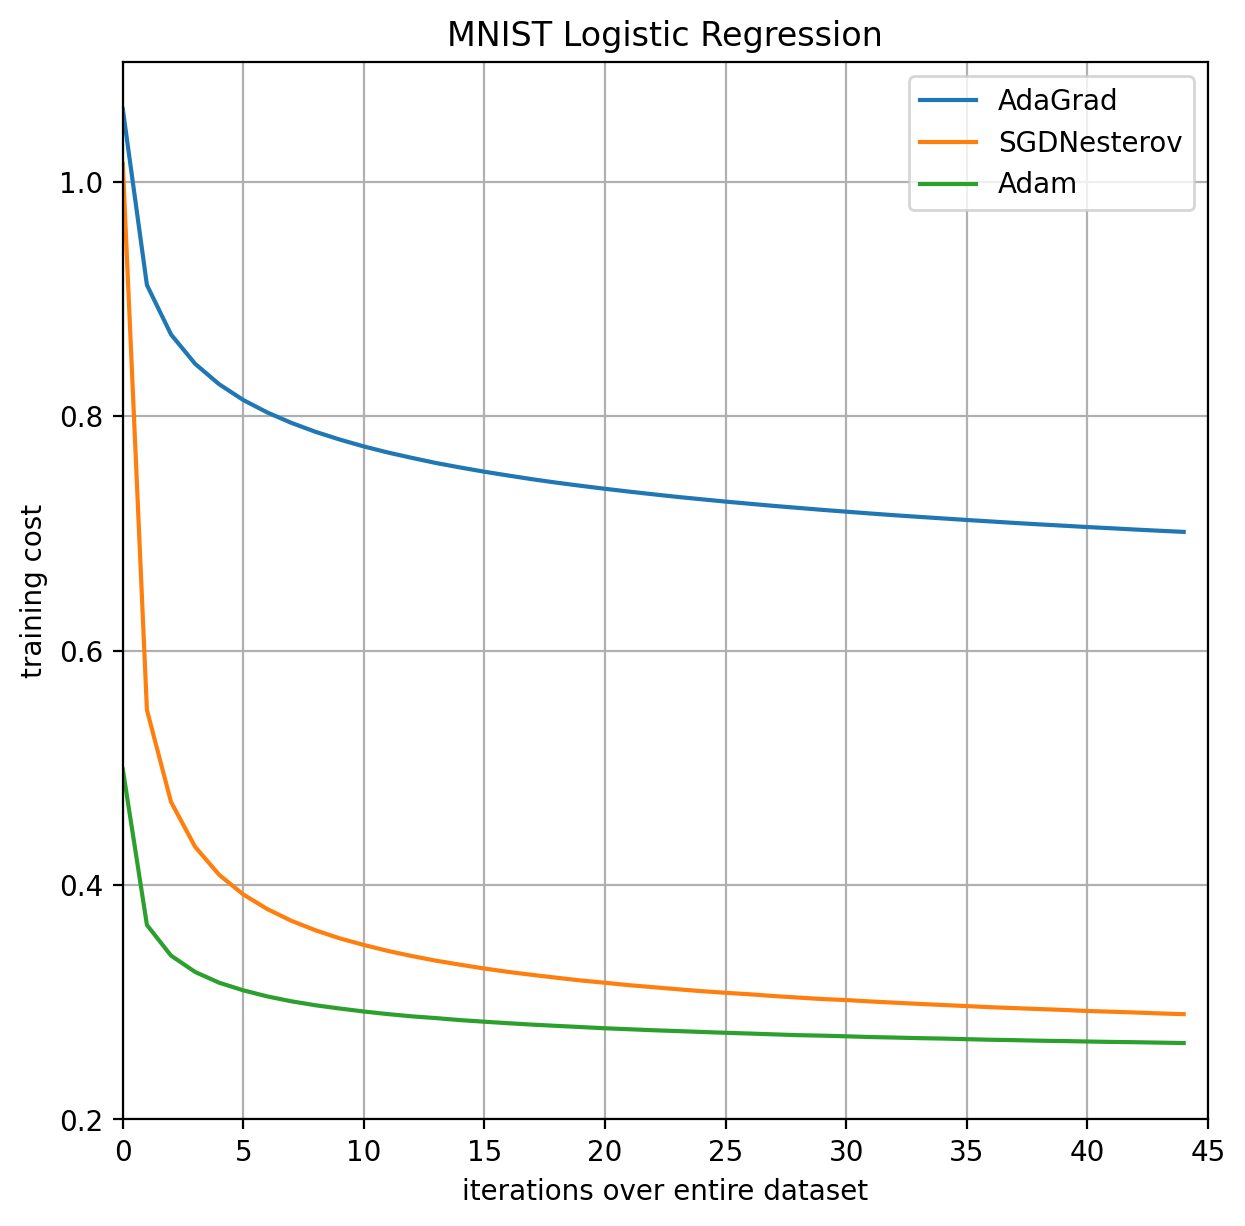

In [ ]:
logs = [np.array(logging_Adagrad), np.array(logging_SGDNesterov), np.array(logging_Adam)]
names = ['AdaGrad', 'SGDNesterov', 'Adam']

plt.figure(figsize=(7,7), dpi=200)
for log,name in zip(logs, names):
    plt.plot(log[:,0], log[:,1], label=name)
plt.grid(True)
plt.legend()
plt.title('MNIST Logistic Regression')
plt.xlabel('iterations over entire dataset')
plt.ylabel('training cost')
plt.xlim(0,45)
plt.ylim(0.2)
plt.savefig('fig1a.png')
plt.show()